# **CREDIT LOAN PREDICTION by ID/X Partners**

* Created by: Samuel Akwila
* Check my other portofolio here: https://github.com/samuelakwila
* Reach me on LinkedIn: linkedin.com/in/samuel-akwila-942a34132

## **Import Library & Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDX Partners Final Project/loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analyst**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
pd.set_option('display.max_rows',None)
df.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

We need to drop this column cause null values: (18)

* annual_inc_joint
* dti_joint
* verification_status_joint
* open_acc_6m
* open_il_6m
* open_il_12m
* open_il_24m
* mths_since_rcnt_il
* total_bal_il
* il_util
* open_rv_12m
* open_rv_24m
* max_bal_bc
* all_util
* inq_fi
* total_cu_tl
* inq_last_12m
* mths_since_last_record
* mths_since_last_major_derog
* desc



In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.select_dtypes('object').describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [ ]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
df['last_credit_pull_d'].value_counts()

Jan-16    327699
Dec-15     13992
Nov-15      8384
Sep-15      8051
Oct-15      7957
Jul-15      7351
Aug-15      6574
Jun-15      6214
Apr-15      5698
Mar-15      5479
May-15      5353
Jan-15      5141
Feb-15      4830
Dec-14      3686
Oct-14      3358
Nov-14      3168
Sep-14      2961
Aug-14      2812
Jul-14      2773
May-14      2290
Jun-14      2236
Mar-14      2204
Apr-14      2191
Feb-14      1931
Jan-14      1793
Feb-13      1446
Nov-13      1412
Dec-13      1395
Oct-13      1273
Sep-13      1063
Aug-13      1048
Mar-13      1038
Jul-13      1020
May-13       997
Jun-13       853
Apr-13       836
Dec-12       576
Nov-12       576
Sep-12       525
Oct-12       515
Aug-12       505
Feb-12       420
Mar-12       402
May-12       388
Jul-12       384
Jun-12       376
Apr-12       360
Mar-11       335
Aug-11       305
Jan-12       286
Dec-11       279
Nov-11       227
May-11       227
Feb-11       210
Jun-11       204
Jul-11       186
Apr-11       185
Sep-11       184
Jan-11       1

In [ ]:
df['policy_code'].value_counts()

1    466285
Name: policy_code, dtype: int64

In [ ]:
df['application_type'].value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

In [ ]:
df.duplicated().sum()

0

Later we need to drop this 

We need to drop this cause all unique value : (3)
* Unnamed: 0 
* Member_id
* id

And we need to drop this cause only 1 value : (2)
* application_type
* policy code

and we need to change data type to date in this column :
* last_pymnt_d	---> Month & Year
* next_pymnt_d	---> Month & Year
* last_credit_pull_d --> Month & Year
* issue_d --> Month & Year
* earliest_cr_line -- > Month

### **Univariate Analysis**

In [ ]:
# we group column based on data type numerical and categorical
nums = [col for col in df.columns if df[col].dtype!="O"]
cats = [col for col in df.columns if df[col].dtype=="O"]

print(len(nums))
print(len(cats))

53
22


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 20
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

#### **Boxplot**

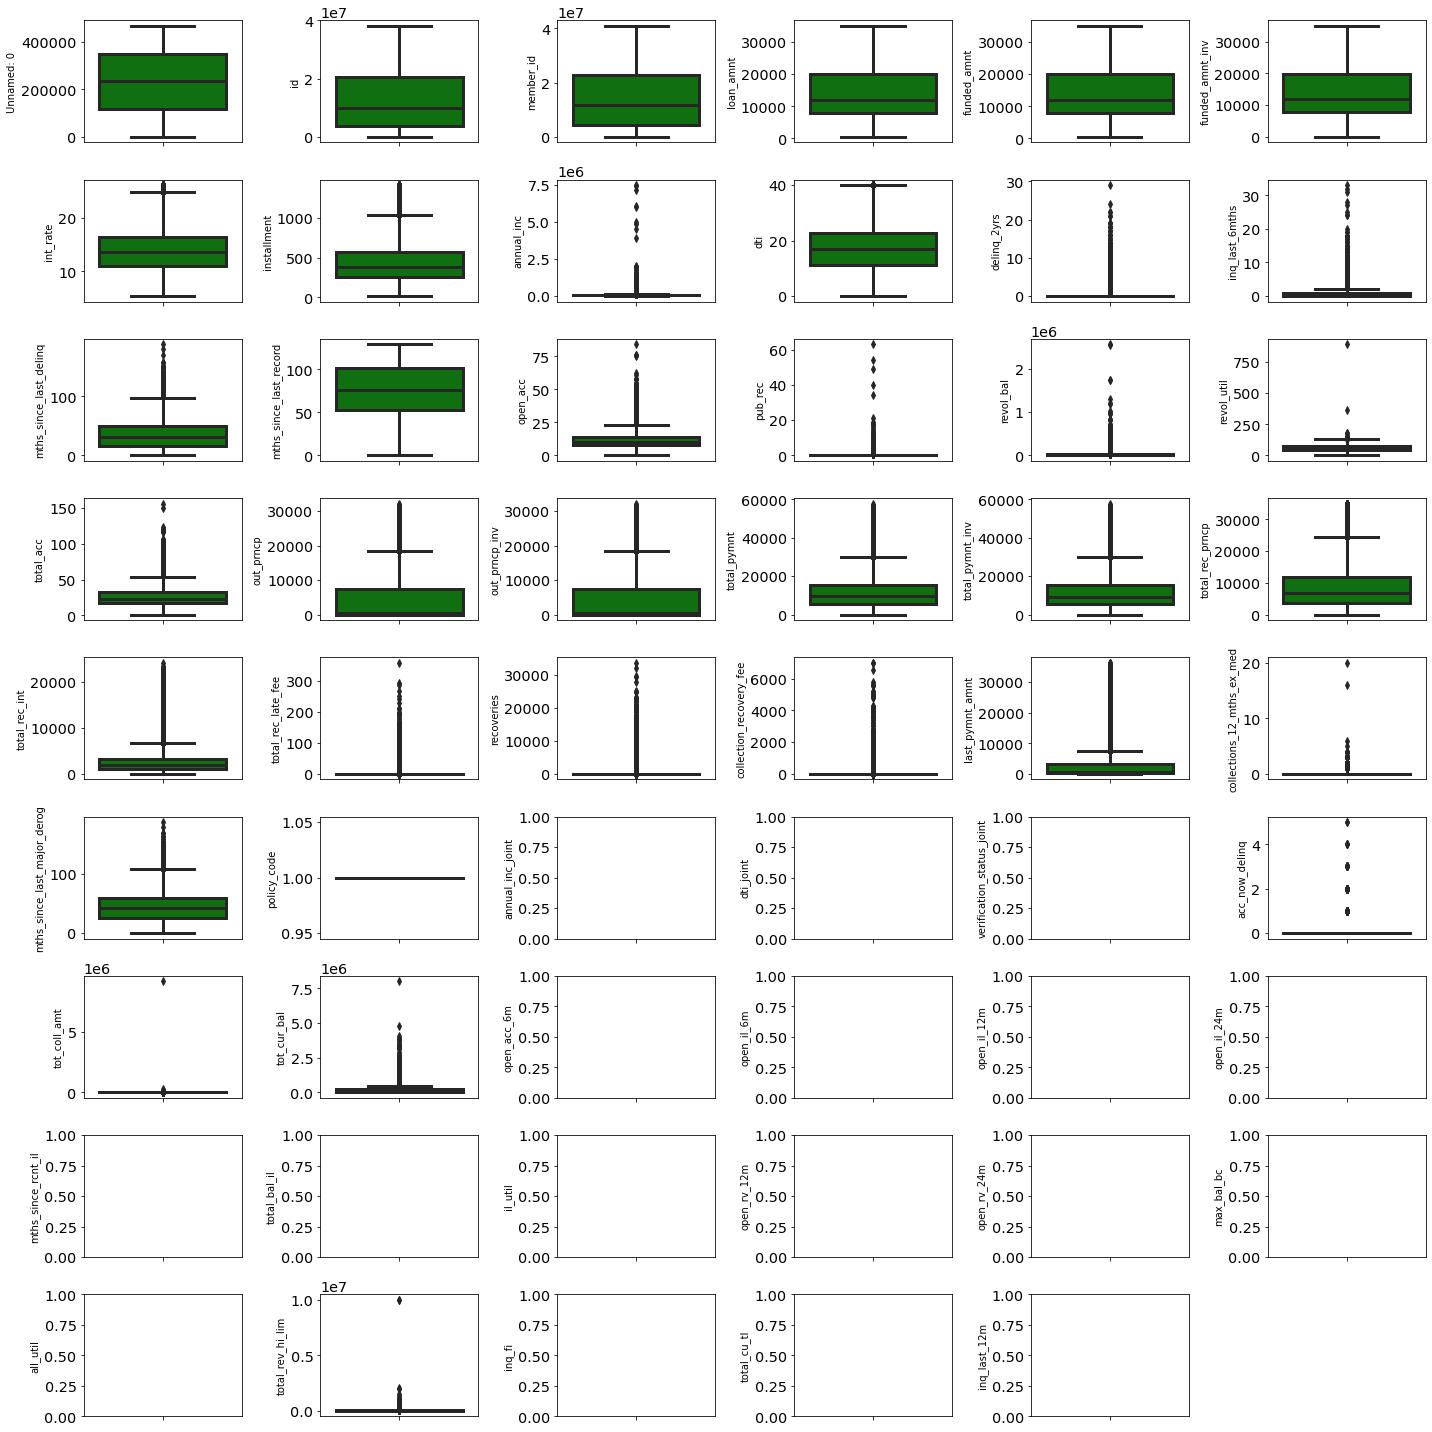

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(9, 6, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

and we need handle the outliers from this columns :
* total_rev_hi_lim
* total_cur_bal
* total_coll_amt
* acc_now_delinq
* mths_since_last_major_derog
* open_acc
* 'pub_rec',
* 'revol_bal',
* 'revol_util',
* 'total_acc',
* 'out_prncp',
* 'out_prncp_inv',
* 'total_pymnt',
* 'total_pymnt_inv',
* 'total_rec_prncp',
* 'total_rec_int',
* 'total_rec_late_fee',
* 'recoveries',
* 'collection_recovery_fee',
* 'last_pymnt_amnt',
* 'collections_12_mths_ex_med'
* 'int_rate',
* 'installment',
* 'annual_inc',
* 'dti',
* 'delinq_2yrs',
* 'inq_last_6mths',
* 'mths_since_last_delinq',



#### **Dist Plot**

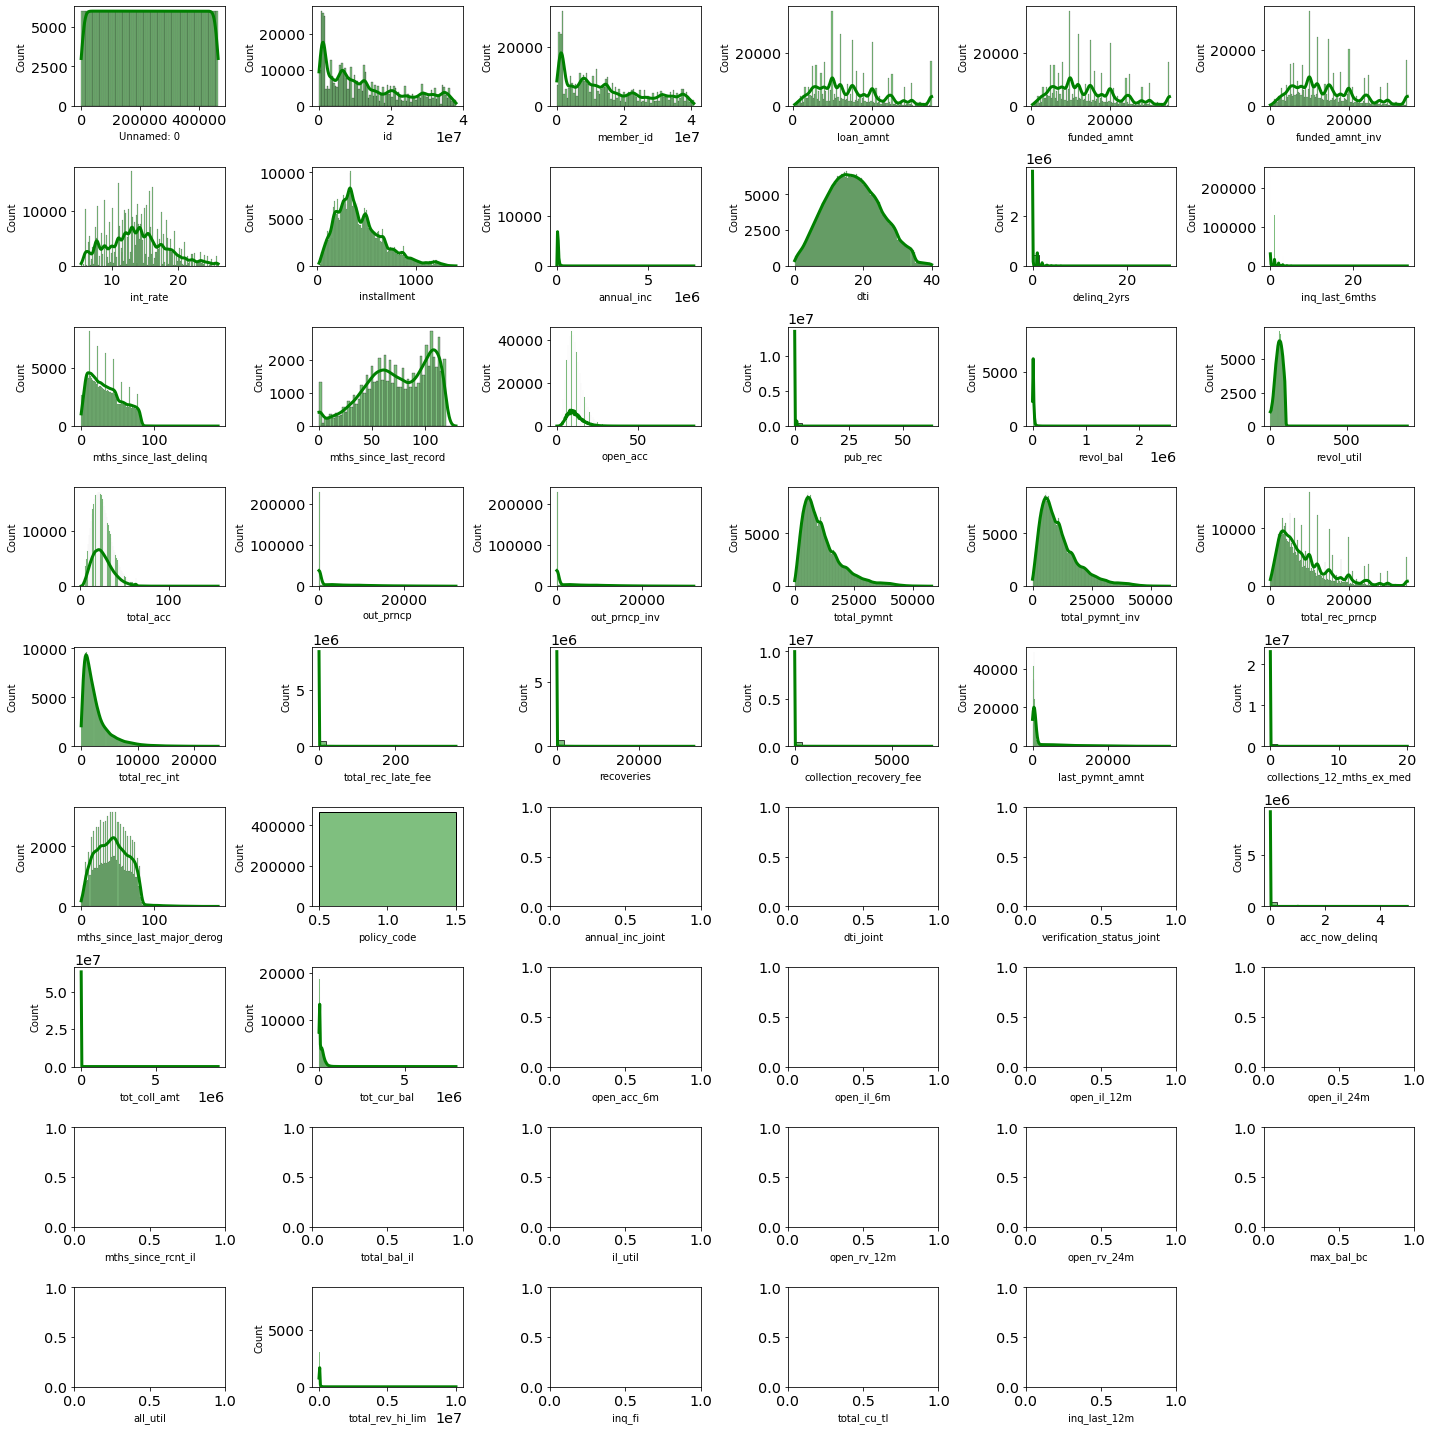

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(9, 6, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

we can see distribution of columns is mostly skewed and we need handle it later.

### **Multivariate Analysis**

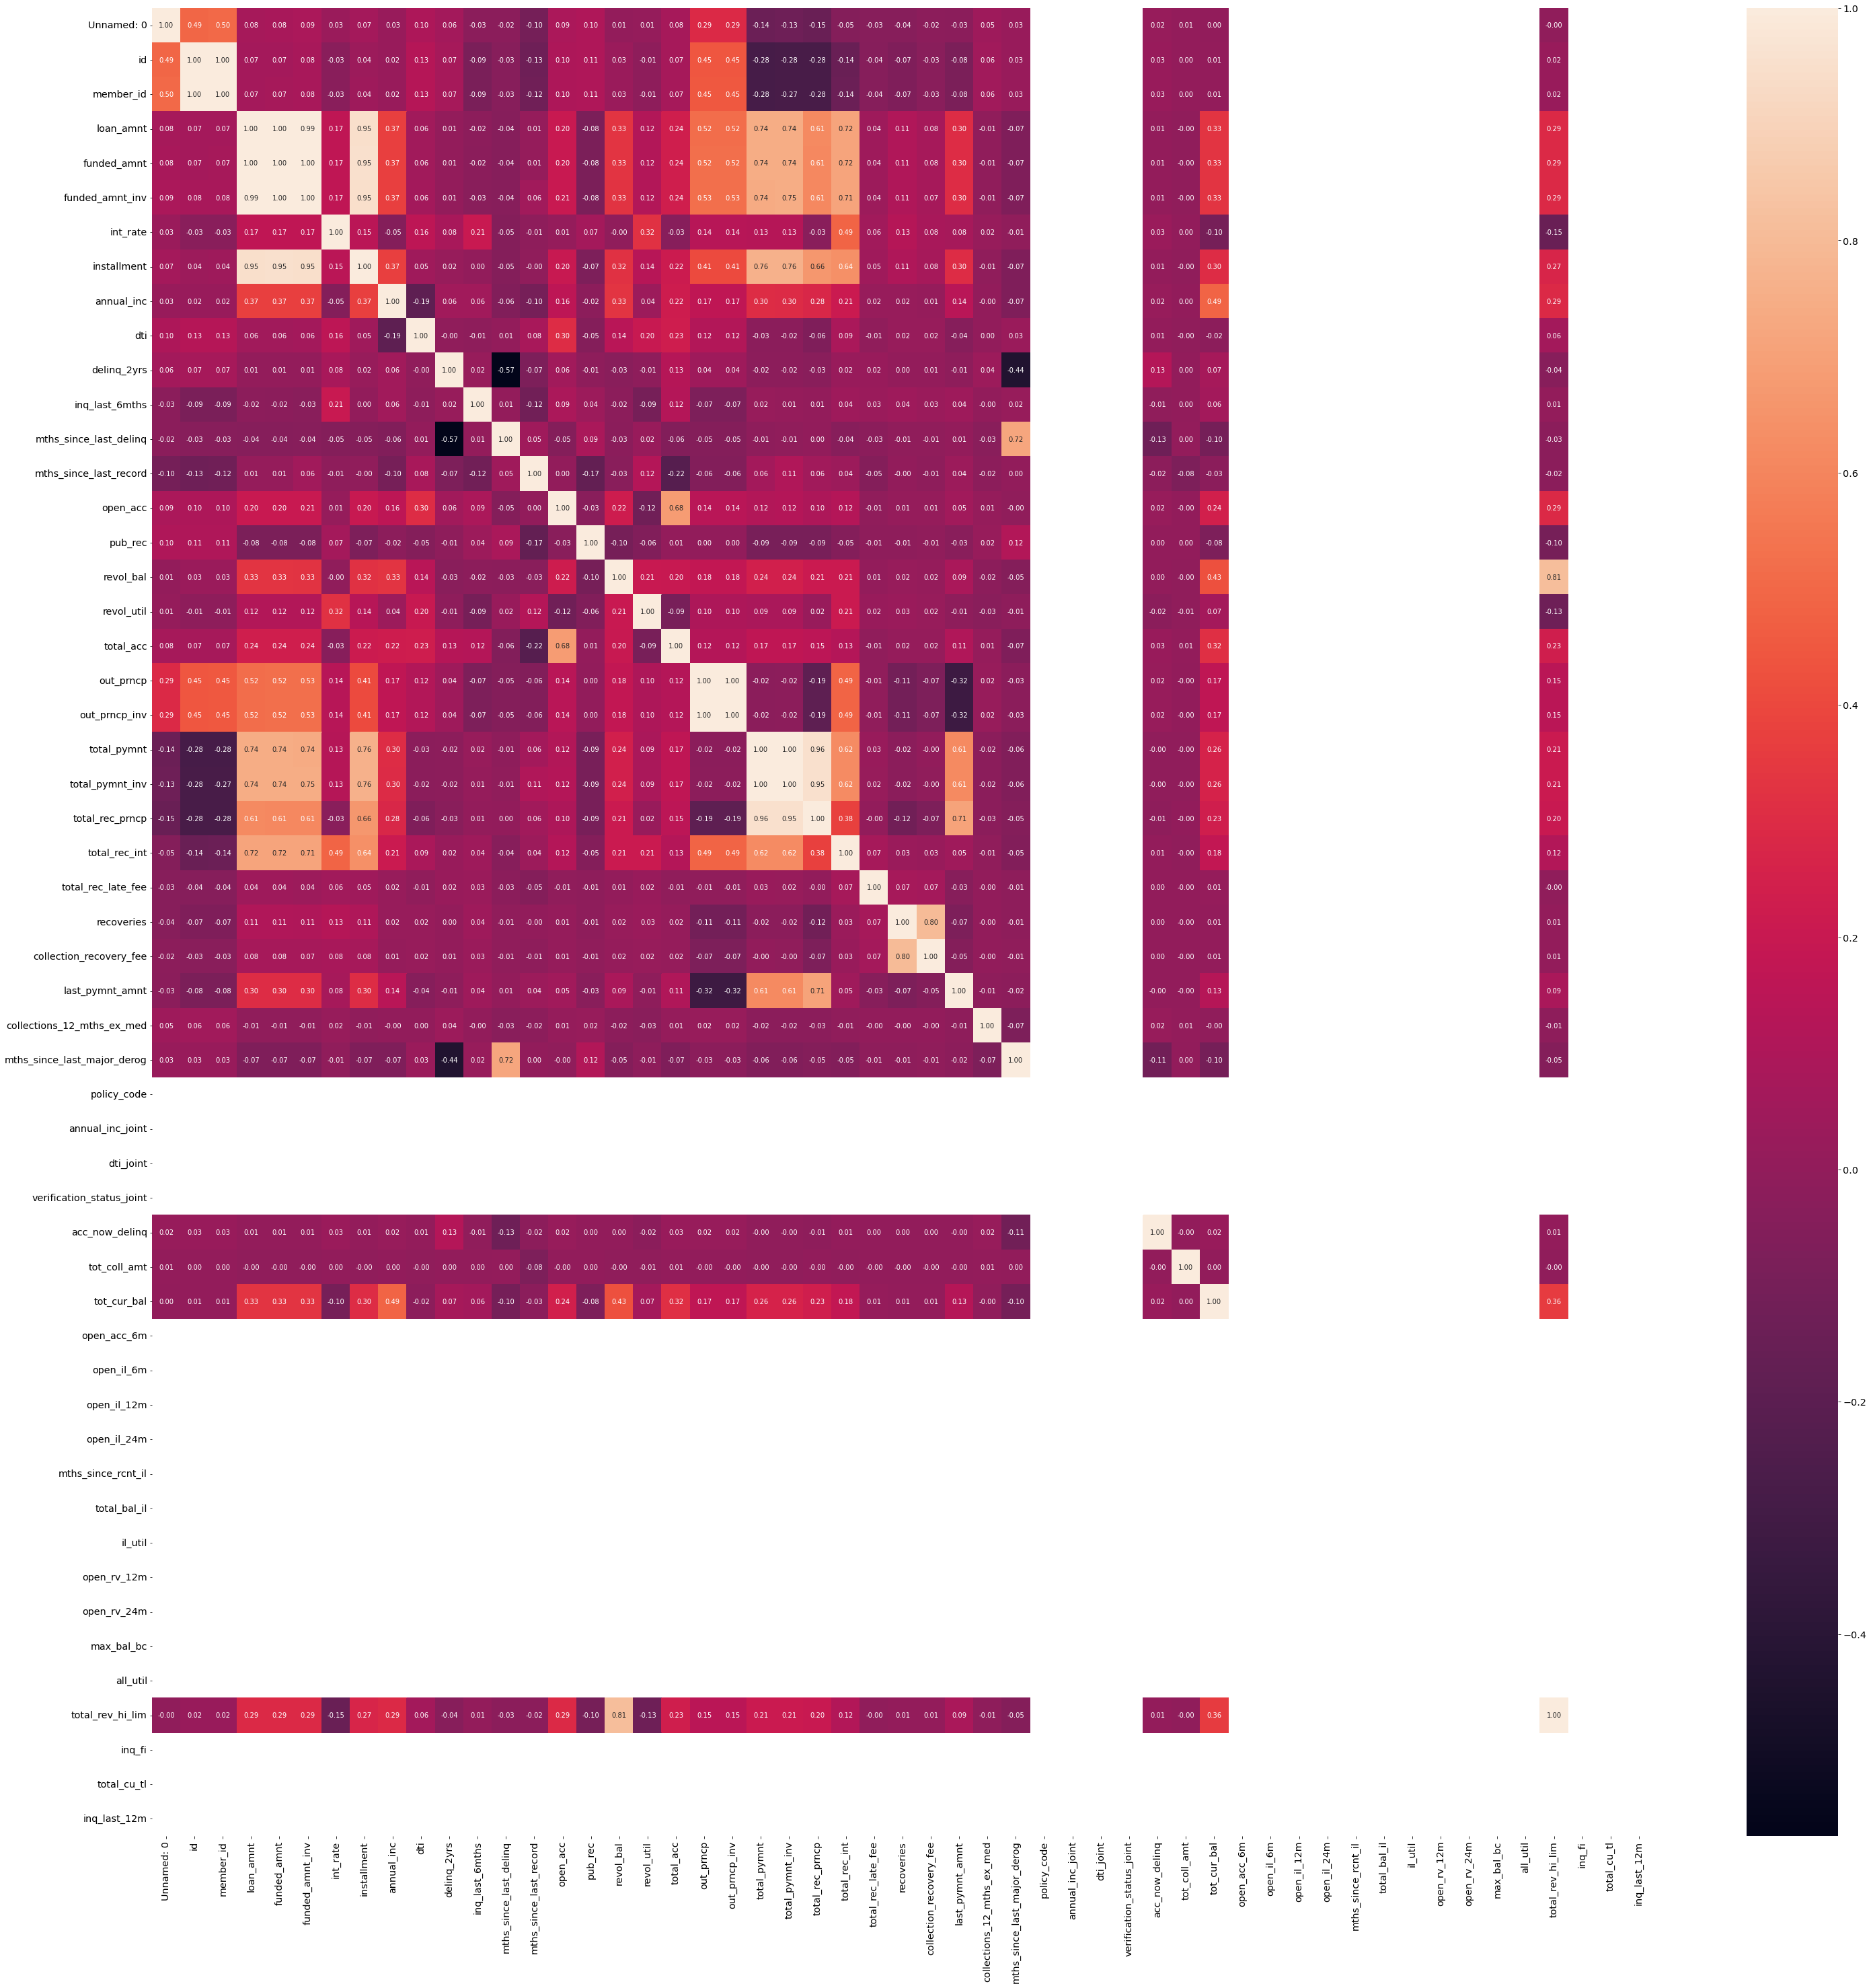

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data=df.corr(),annot=True, fmt='.2f');

And we need to drop this colum because is Data Redundant can effcect multicollinearity :
- loan_amnt
- funden_amnt
- funden_amnt_int
- revol_bal
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- last_pymnt_amnt

and we need to drop columns with only one value

## **Data Preprocessing**

### **Data Cleaning**

In [ ]:
df_b = df.copy()

#### **Drop unnecessary Columns**

In [ ]:
missing_values = df.isnull().mean()
missing_values[missing_values==1].index

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [ ]:
drop_col = ['Unnamed: 0','annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

data = df.drop(columns=drop_col, axis=1)

#### **Handle Missing Value**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
data.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

We drop this column because is to much null values :
* mths_since_last_record
* desc
* mths_since_last_delinq
* mths_since_last_major_derog
* next_pymnt_d

We need to drop this cause all unique value : (2)
* Member_id
* id

And we need to drop this cause only 1 value : (2)
* application_type
* policy code

In [ ]:
drop_col_2 = ['mths_since_last_record', 'desc', 'mths_since_last_major_derog', 'member_id','id','application_type','application_type', 'policy_code']

data = data.drop(columns=drop_col_2, axis=1)

In [ ]:
data.isna().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
mths_since_last_delinq        250351
open_acc                          29
p

In [ ]:
#data['next_pymnt_d'].value_counts()

In [ ]:
#data['next_pymnt_d'].mode()

In [ ]:
# We change null values from annual_inc with median
data['annual_inc'].fillna(data['annual_inc'].median(),inplace=True)

# We change null values from title with other
data['title'].fillna('Other', inplace=True)

# We change null values from mths_since_last_delinq with other
data['mths_since_last_delinq'].fillna(0, inplace=True)

# We change null values from next_pymnt_d with modus
data['next_pymnt_d'].fillna(data['next_pymnt_d'].mode()[0],inplace=True)

# We change null values from delinq_2yrs with modus
data['delinq_2yrs'].fillna(data['delinq_2yrs'].mode()[0],inplace=True)

# We change null values from earliest_cr_line with modus
data['earliest_cr_line'].fillna(data['earliest_cr_line'].mode()[0],inplace=True)

# We change null values from inq_last_6mths with modus
data['inq_last_6mths'].fillna(data['inq_last_6mths'].mode()[0],inplace=True)

# We change null values from open_acc with median
data['open_acc'].fillna(data['open_acc'].median(),inplace=True)

# We change null values from pub_rec with median
data['pub_rec'].fillna(data['pub_rec'].median(),inplace=True)

# We change null values from total_acc with median
data['total_acc'].fillna(data['total_acc'].median(),inplace=True)

# We change null values from last_pymnt_d with modus
data['last_pymnt_d'].fillna(data['last_pymnt_d'].mode()[0],inplace=True)

# We change null values from last_credit_pull_d with modus
data['last_credit_pull_d'].fillna(data['last_credit_pull_d'].mode()[0],inplace=True)

# We change null values from collections_12_mths_ex_med with median
data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].median(),inplace=True)

# We change null values from acc_now_delinq with median
data['acc_now_delinq'].fillna(data['acc_now_delinq'].median(),inplace=True)

# We change null values from tot_coll_amt with median
data['tot_coll_amt'].fillna(data['tot_coll_amt'].median(),inplace=True)

# We change null values from tot_cur_bal with modus
data['tot_cur_bal'].fillna(data['tot_cur_bal'].mode()[0],inplace=True)

# We change null values from total_rev_hi_lim with median
data['total_rev_hi_lim'].fillna(data['total_rev_hi_lim'].median(),inplace=True)

# We change null values from revol_util with modus
data['revol_util'].fillna(data['revol_util'].mode()[0],inplace=True)

# We change null values from emp_title with other
data['emp_title'].fillna('Other', inplace=True)

# We change null values from emp_length with modus
data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)

data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

#### **Handle Duplicated Data**

In [ ]:
data.duplicated().sum()

0

#### **Handle Outliers**

In [ ]:
nums = [col for col in data.columns if data[col].dtype!="O"]
cats = [col for col in data.columns if data[col].dtype=="O"]

In [ ]:
from scipy import stats
df_ho = data.copy()
print(f'Number of rows before filtering outliers: {len(df_ho)}')

filtered_entries1 = np.array([True] * len(df_ho))

for col in nums:
    zscore = abs(stats.zscore(df_ho[col])) # calculate absolute z-score
    filtered_entries1 = (zscore < 3) & filtered_entries1 # we keep  less than 3 absolute z-score
    
df_ho = df_ho[filtered_entries1] # we filtere, just take z-score under 3 

print(f'Number of rows after filtering outliers: {len(df_ho)}')

Number of rows before filtering outliers: 466285
Number of rows after filtering outliers: 377334


### **Feature Transformation**



In [ ]:
df_ho.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.00000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.000000,377334.0,377334.0,377334.000000,377334.000000,377334.000000
mean,12671.190842,12645.827768,12584.949469,13.395260,386.086881,65477.781031,17.19050,0.184598,0.731988,15.752485,10.717971,0.123063,13814.223081,55.884385,23.751451,3916.526433,3915.083143,10241.254703,10178.168354,8042.421465,2175.546943,0.138275,23.148024,1.438213,2567.005492,0.0,0.0,121.722429,98453.010367,26021.717468
std,6794.930050,6777.916747,6797.566340,4.174159,200.467819,32163.268691,7.85166,0.465837,0.956310,22.699654,4.473605,0.328510,10860.471673,23.626797,10.624334,5457.811020,5456.144082,6558.544124,6546.999925,5714.906659,1799.847224,1.436643,149.696723,14.727836,4194.565971,0.0,0.0,1039.010544,115185.444334,17831.802391
min,500.000000,500.000000,0.000000,5.420000,15.670000,1896.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,7500.000000,7450.000000,7200.000000,10.250000,240.920000,43000.000000,11.33000,0.000000,0.000000,0.000000,7.000000,0.000000,6167.000000,39.000000,16.000000,0.000000,0.000000,5288.925000,5238.080000,3605.242500,896.152500,0.000000,0.000000,0.000000,295.080000,0.0,0.0,0.000000,13325.000000,14500.000000
50%,12000.000000,11975.000000,11750.000000,13.110000,350.790000,60000.000000,16.83000,0.000000,0.000000,0.000000,10.000000,0.000000,11038.000000,57.200000,22.000000,559.460000,558.935000,8757.440000,8703.450000,6490.750000,1661.015000,0.000000,0.000000,0.000000,498.075000,0.0,0.0,0.000000,43871.000000,22800.000000
75%,17100.000000,17000.000000,17000.000000,15.950000,503.097500,80000.000000,22.75000,0.000000,1.000000,29.000000,13.000000,0.000000,18408.000000,74.300000,30.000000,6631.645000,6631.250000,13776.632500,13706.937500,11016.390000,2879.260000,0.000000,0.000000,0.000000,2916.070000,0.0,0.0,0.000000,162254.750000,31400.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1162.430000,238000.000000,39.99000,2.000000,4.000000,83.000000,26.000000,1.000000,78250.000000,127.400000,59.000000,23466.110000,23466.110000,36279.700000,36228.470000,29950.000000,10037.690000,16.440000,1741.730000,265.426200,19787.920000,0.0,0.0,40599.000000,563948.000000,132530.000000


In [ ]:
df_ho['acc_now_delinq'].value_counts()

0.0    377334
Name: acc_now_delinq, dtype: int64

In [ ]:
df_ho['collections_12_mths_ex_med'].value_counts()

0.0    377334
Name: collections_12_mths_ex_med, dtype: int64

because column **acc_now_delinq & collections_12_mths_ex_med** just have 1 value after filter outlier, now we need to drop them.

In [ ]:
drop_col = ['acc_now_delinq', 'collections_12_mths_ex_med']

data_ho = df_ho.drop(columns=drop_col, axis=1)

In [ ]:
nums = [col for col in data_ho.columns if data_ho[col].dtype!="O"]
cats = [col for col in data_ho.columns if data_ho[col].dtype=="O"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for col in nums :
  data_ho[col] = StandardScaler().fit_transform(data_ho[col].values.reshape(len(data_ho), 1))

In [ ]:
data_ho.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05,3.773340e+05
mean,1.062046e-17,2.124092e-17,-3.491947e-16,-1.888710e-16,3.276525e-17,1.204029e-16,4.995854e-16,1.675924e-17,3.148477e-17,3.903584e-17,6.419353e-17,-2.673946e-17,-5.221256e-17,-4.511436e-16,9.178037e-17,1.715091e-16,1.535071e-16,-5.886447e-17,3.555218e-17,2.698802e-16,-2.568494e-16,4.304205e-17,2.371715e-17,8.727985e-18,1.191224e-16,-6.256468e-18,3.464831e-18,-4.579603e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.791219e+00,-1.791973e+00,-1.851393e+00,-1.910629e+00,-1.847765e+00,-1.976847e+00,-2.189412e+00,-3.962715e-01,-7.654307e-01,-6.939535e-01,-2.395828e+00,-3.746108e-01,-1.271974e+00,-2.365300e+00,-2.141450e+00,-7.176012e-01,-7.175559e-01,-1.561515e+00,-1.554633e+00,-1.407273e+00,-1.208741e+00,-9.624898e-02,-1.546330e-01,-9.765285e-02,-6.119844e-01,-1.171524e-01,-8.547360e-01,-1.459289e+00
25%,-7.610377e-01,-7.665828e-01,-7.921889e-01,-7.535085e-01,-7.241415e-01,-6.988659e-01,-7.464036e-01,-3.962715e-01,-7.654307e-01,-6.939535e-01,-8.310918e-01,-3.746108e-01,-7.041345e-01,-7.146296e-01,-7.295950e-01,-7.176012e-01,-7.175559e-01,-7.550969e-01,-7.545586e-01,-7.764230e-01,-7.108360e-01,-9.624898e-02,-1.546330e-01,-9.765285e-02,-5.416361e-01,-1.171524e-01,-7.390528e-01,-6.461339e-01
50%,-9.877831e-02,-9.897269e-02,-1.228308e-01,-6.833957e-02,-1.760728e-01,-1.703119e-01,-4.591385e-02,-3.962715e-01,-7.654307e-01,-6.939535e-01,-1.604908e-01,-3.746108e-01,-2.556267e-01,5.568324e-02,-1.648530e-01,-6.150947e-01,-6.151144e-01,-2.262418e-01,-2.252513e-01,-2.715134e-01,-2.858757e-01,-9.624898e-02,-1.546330e-01,-9.765285e-02,-4.932413e-01,-1.171524e-01,-4.738627e-01,-1.806728e-01
75%,6.517823e-01,6.424065e-01,6.495054e-01,6.120380e-01,5.836886e-01,4.515162e-01,7.080678e-01,-3.962715e-01,2.802566e-01,5.836007e-01,5.101103e-01,-3.746108e-01,4.229819e-01,7.794387e-01,5.881364e-01,4.974746e-01,4.978187e-01,5.390499e-01,5.389910e-01,5.203886e-01,3.909854e-01,-9.624898e-02,-1.546330e-01,-9.765285e-02,8.321838e-02,-1.171524e-01,5.539053e-01,3.016122e-01
max,3.286103e+00,3.298093e+00,3.297515e+00,3.034086e+00,3.872662e+00,5.363959e+00,2.903785e+00,3.897081e+00,3.417319e+00,2.962495e+00,3.416048e+00,2.669437e+00,5.933063e+00,3.026890e+00,3.317723e+00,3.581951e+00,3.583309e+00,3.970162e+00,3.978973e+00,3.833415e+00,4.368234e+00,1.134711e+01,1.148044e+01,1.792445e+01,4.105535e+00,3.895758e+01,4.041271e+00,5.972948e+00


### **Feature Encoding**

In [ ]:
#define values
ambiguous = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#drop rows that contain ambiguous ending
data_ho = data_ho[data_ho.loan_status.isin(ambiguous) == False]

#create new column to classify ending when 1 equal bad loan, and 0 equal good loan
data_ho['loan_ending'] = np.where(data_ho['loan_status'].isin(good_loan), 0, 1)

In [ ]:
cats

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [ ]:
data_ho.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879,190879
unique,2,7,35,109139,11,6,3,91,7,2,190879,14,43066,867,50,619,2,98,98,103
top,36 months,B,B3,Other,10+ years,MORTGAGE,Not Verified,Oct-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jul-15,Feb-16,Jan-16
freq,158677,62803,15266,10935,61651,87994,76020,7318,154190,190875,1,109651,45013,2403,32724,1677,144062,9567,188764,83363


In [ ]:
#data_fe = data_ho.copy()
data_fe2 = data_ho.copy()

we need to drop column : 
* url , cause they are text
* loan_status, cause we have target now
* sub_grade wee need to drop cause make redundant data with grade
* title cause they are text
* zip_code, emp_title we need to drop this cuase so many unique value.
* issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d cause they are data leakage
* addr_state cause we have encode them

we need to adjust this column :
* data **purpose** we need to adjust the value with aggregation function to reduce the cardinality
* data  home_ownership we need to change None and any to other 

we need to label encoding :
* term
* grade
* emp_length
* pymnt_plan

after adjusting we need to one-hot this column : 
* pupose
* home_ownership
* verification_status
* initial_list_status

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.7 MB/s 


In [ ]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
data_fe2['addr_state_encode'] = encoder.fit_transform(data_fe2['addr_state'], data_fe2['loan_ending'])
data_fe2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_ending,addr_state_encode
0,-1.128960,-1.128051,-1.119512,36 months,-0.657681,-1.113481,B,B2,Other,10+ years,RENT,-1.289603,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,1.332140,-0.396272,Jan-85,0.280257,-0.693954,-1.725227,-0.374611,-0.015305,1.177293,-1.388461,f,-0.717601,-0.717556,-0.667860,-0.663876,-0.532367,-0.730328,-0.096249,-0.154633,-0.097653,Jan-15,-0.571069,Feb-16,Jan-16,-0.117152,-0.854736,-0.180673,0,0.184829
2,-1.511598,-1.511651,-1.498325,36 months,0.614434,-1.505265,C,C5,Other,10+ years,RENT,-1.654864,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,-1.078818,-0.396272,Nov-01,1.325944,-0.693954,-1.948760,-0.374611,-0.999794,1.803701,-1.294337,f,-0.717601,-0.717556,-1.103539,-1.095850,-0.987318,-0.873351,-0.096249,-0.154633,-0.097653,Jun-14,-0.457043,Feb-16,Jan-16,-0.117152,-0.854736,-0.180673,0,0.174807
5,-1.128960,-1.128051,-1.115835,36 months,-1.316497,-1.145457,A,A4,Veolia Transportaton,3 years,RENT,-0.916506,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,-0.762961,-0.396272,Nov-04,2.371631,-0.693954,-0.384024,-0.374611,-0.538764,-1.167506,-1.106090,f,-0.717601,-0.717556,-0.702882,-0.694485,-0.532367,-0.857944,-0.096249,-0.154633,-0.097653,Jan-15,-0.573594,Feb-16,Sep-15,-0.117152,-0.854736,-0.180673,0,0.184829
7,-1.423297,-1.423128,-1.410058,36 months,1.256480,-1.380058,E,E1,MKC Accounting,9 years,RENT,-0.543409,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,car,Car Downpayment,900xx,CA,-1.508027,-0.396272,Jan-07,1.325944,-0.693954,-1.501693,-0.374611,-0.515008,1.338127,-1.859079,f,-0.717601,-0.717556,-0.961055,-0.953114,-0.882329,-0.687508,-0.096249,-0.154633,-0.097653,Jan-15,-0.585440,Feb-16,Dec-14,-0.117152,-0.854736,-0.180673,0,0.178982
8,-1.040658,-1.039528,-1.027568,60 months,1.888944,-1.165759,F,F2,Other,4 years,OWN,-0.792140,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,-1.482555,-0.396272,Apr-04,1.325944,-0.693954,0.063043,-0.374611,-0.792252,-0.985509,-1.011966,f,-0.717601,-0.717556,-1.463015,-1.455959,-1.378922,-1.044872,-0.096249,1.108322,0.044255,Apr-12,-0.575654,Feb-16,Aug-12,-0.117152,-0.854736,-0.180673,1,0.178982


In [ ]:
data_fe2['home_ownership'] = np.where(data_fe2['home_ownership'] == 'NONE' , 'OTHER',
                                    np.where(data_fe2['home_ownership'] == 'ANY' , 'OTHER', data_fe2['home_ownership']))

data_fe2['home_ownership'].value_counts()

MORTGAGE    87994
RENT        86582
OWN         16117
OTHER         186
Name: home_ownership, dtype: int64

In [ ]:
data_fe2['purpose'] = np.where((data_fe2['purpose'] == 'wedding') | (data_fe2['purpose'] == 'moving' ) | (data_fe2['purpose'] == 'vacation') | (data_fe2['purpose'] == 'house' ) | 
                              (data_fe2['purpose'] == 'educational') | (data_fe2['purpose'] == 'renewable_energy'), 'other', data_fe2['purpose'])
data_fe2['purpose'].value_counts()

debt_consolidation    109651
credit_card            39053
other                  17901
home_improvement       10362
major_purchase          5044
small_business          3448
car                     3145
medical                 2275
Name: purpose, dtype: int64

In [ ]:
drop_col = ['url', 'loan_status', 'sub_grade', 'title', 'zip_code', 'emp_title', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'addr_state']

data_fe2 = data_fe2.drop(columns=drop_col, axis=1)

In [ ]:
data_fe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190879 entries, 0 to 466278
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                190879 non-null  float64
 1   funded_amnt              190879 non-null  float64
 2   funded_amnt_inv          190879 non-null  float64
 3   term                     190879 non-null  object 
 4   int_rate                 190879 non-null  float64
 5   installment              190879 non-null  float64
 6   grade                    190879 non-null  object 
 7   emp_length               190879 non-null  object 
 8   home_ownership           190879 non-null  object 
 9   annual_inc               190879 non-null  float64
 10  verification_status      190879 non-null  object 
 11  pymnt_plan               190879 non-null  object 
 12  purpose                  190879 non-null  object 
 13  dti                      190879 non-null  float64
 14  deli

In [ ]:
data_fe2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
# Label Encoding
mapping_term= {
    ' 36 months' : 0,
    ' 60 months' : 1
}

mapping_grade = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6
}

mapping_emp_length = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

mapping_pyment_plan = {
    'n' : 0,
    'y' : 1
}

data_fe2['term'] = data_fe2['term'].map(mapping_term)
data_fe2['grade'] = data_fe2['grade'].map(mapping_grade)
data_fe2['emp_length'] = data_fe2['emp_length'].map(mapping_emp_length)
data_fe2['pymnt_plan'] = data_fe2['pymnt_plan'].map(mapping_pyment_plan)

In [ ]:
# One Hot Encoder
# WARNING: just run this code 1 time
for cat in ['purpose', 'home_ownership', 'verification_status', 'initial_list_status']:
    onehots = pd.get_dummies(data_fe2[cat], prefix=cat)
    data_fe2 = data_fe2.join(onehots)

In [ ]:
# drop column after one hot encoding 
# WARNING: just run this code 1 time
data_fe2 = data_fe2.drop(columns=['purpose', 'home_ownership', 'verification_status', 'initial_list_status'])

In [ ]:
data_fe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190879 entries, 0 to 466278
Data columns (total 51 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            190879 non-null  float64
 1   funded_amnt                          190879 non-null  float64
 2   funded_amnt_inv                      190879 non-null  float64
 3   term                                 190879 non-null  int64  
 4   int_rate                             190879 non-null  float64
 5   installment                          190879 non-null  float64
 6   grade                                190879 non-null  int64  
 7   emp_length                           190879 non-null  int64  
 8   annual_inc                           190879 non-null  float64
 9   pymnt_plan                           190879 non-null  int64  
 10  dti                                  190879 non-null  float64
 11  delinq_2yrs  

In [ ]:
data_clean = data_fe2.copy()

## **Feature Engineering**

### **Feature Selection**

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190879 entries, 0 to 466278
Data columns (total 51 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            190879 non-null  float64
 1   funded_amnt                          190879 non-null  float64
 2   funded_amnt_inv                      190879 non-null  float64
 3   term                                 190879 non-null  int64  
 4   int_rate                             190879 non-null  float64
 5   installment                          190879 non-null  float64
 6   grade                                190879 non-null  int64  
 7   emp_length                           190879 non-null  int64  
 8   annual_inc                           190879 non-null  float64
 9   pymnt_plan                           190879 non-null  int64  
 10  dti                                  190879 non-null  float64
 11  delinq_2yrs  

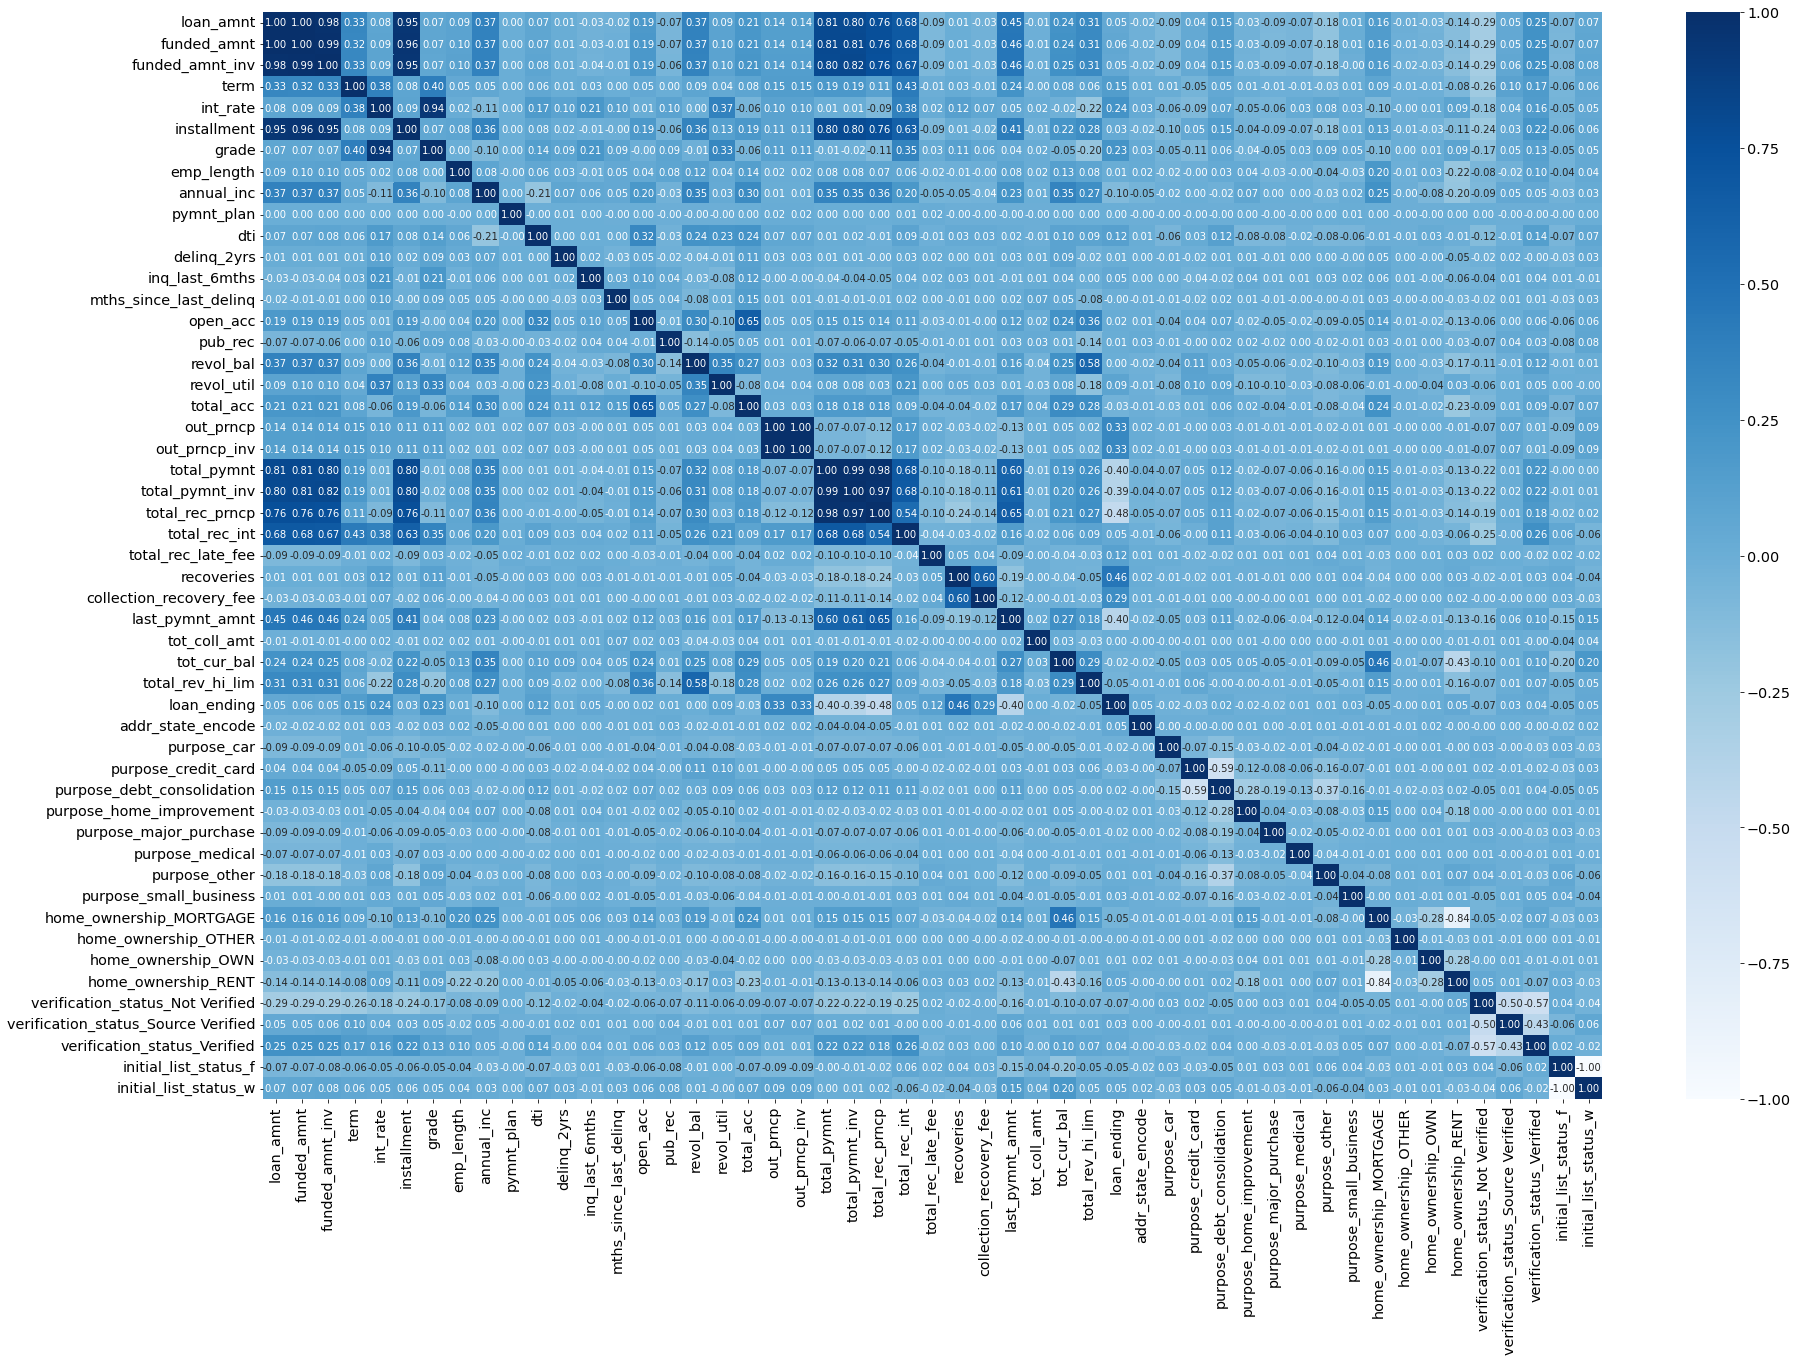

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(data_clean.corr(), cmap='Blues', annot=True, fmt='.2f');

In [ ]:
def checkRedundan(df, treshold):
    df_loop = df.copy()
    redundan = [
                [],[],[]
                ]    
    
    for index, row in df_loop.iterrows():
        # print(df_loop.loc[index,'Age'])
        for i in row.index.values:
            if (len(redundan[0]) == 0) | ((index+' - '+i not in redundan[2]) & (i+' - '+index not in redundan[2])) :
                nilai = df_loop.loc[index,i]
                if (abs(nilai) >= treshold) & (nilai != 1.0) :
                    redundan[0].append(index)
                    redundan[1].append(i)
                    redundan[2].append(index + ' - ' + i)
                    
    for i in redundan[2]:
        print(i)

In [ ]:
checkRedundan(data_clean.corr(), 0.8)

loan_amnt - funded_amnt
loan_amnt - funded_amnt_inv
loan_amnt - installment
loan_amnt - total_pymnt
loan_amnt - total_pymnt_inv
funded_amnt - funded_amnt_inv
funded_amnt - installment
funded_amnt - total_pymnt
funded_amnt - total_pymnt_inv
funded_amnt_inv - installment
funded_amnt_inv - total_pymnt
funded_amnt_inv - total_pymnt_inv
int_rate - grade
installment - total_pymnt
out_prncp - out_prncp_inv
total_pymnt - total_pymnt_inv
total_pymnt - total_rec_prncp
total_pymnt_inv - total_rec_prncp
home_ownership_MORTGAGE - home_ownership_RENT
initial_list_status_f - initial_list_status_w


we need to drop this feature cause redundant data 
* funded_amnt
* funded_amnt_inv
* installment
* total_pymnt
* total_pymnt_inv
* int_rate
* out_prncp_inv
* home_ownership_RENT
* initial_list_status_w

In [ ]:
data_clean_fe = data_clean.drop(columns=['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'int_rate', 'out_prncp_inv', 'home_ownership_RENT', 'initial_list_status_w'])
data_clean_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190879 entries, 0 to 466278
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            190879 non-null  float64
 1   term                                 190879 non-null  int64  
 2   grade                                190879 non-null  int64  
 3   emp_length                           190879 non-null  int64  
 4   annual_inc                           190879 non-null  float64
 5   pymnt_plan                           190879 non-null  int64  
 6   dti                                  190879 non-null  float64
 7   delinq_2yrs                          190879 non-null  float64
 8   inq_last_6mths                       190879 non-null  float64
 9   mths_since_last_delinq               190879 non-null  float64
 10  open_acc                             190879 non-null  float64
 11  pub_rec      

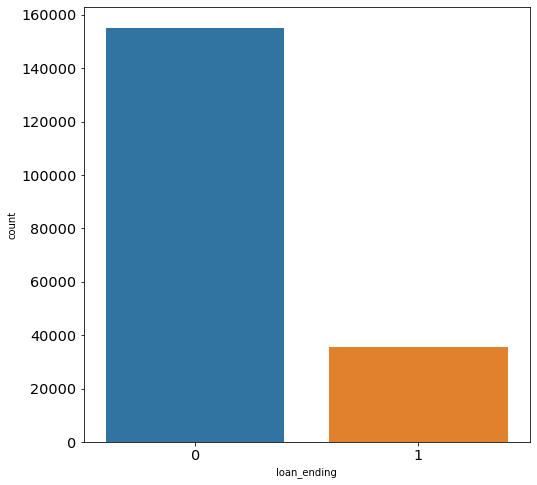

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x = data_clean_fe['loan_ending'], data=data_clean_fe)

In [ ]:
data_clean_fe['loan_ending'].value_counts()

0    155154
1     35725
Name: loan_ending, dtype: int64

cause the data is imbalance we need to resampling later after Train-Test Split

## **Modelling**

In [ ]:
X = data_clean_fe.drop(columns=['loan_ending'], axis=1)
y = data_clean_fe['loan_ending']

print(X.columns.values)
print(X.shape)
print(y.shape)

['loan_amnt' 'term' 'grade' 'emp_length' 'annual_inc' 'pymnt_plan' 'dti'
 'delinq_2yrs' 'inq_last_6mths' 'mths_since_last_delinq' 'open_acc'
 'pub_rec' 'revol_bal' 'revol_util' 'total_acc' 'out_prncp'
 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_amnt' 'tot_coll_amt' 'tot_cur_bal'
 'total_rev_hi_lim' 'addr_state_encode' 'purpose_car'
 'purpose_credit_card' 'purpose_debt_consolidation'
 'purpose_home_improvement' 'purpose_major_purchase' 'purpose_medical'
 'purpose_other' 'purpose_small_business' 'home_ownership_MORTGAGE'
 'home_ownership_OTHER' 'home_ownership_OWN'
 'verification_status_Not Verified' 'verification_status_Source Verified'
 'verification_status_Verified' 'initial_list_status_f']
(190879, 41)
(190879,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)

In [ ]:
from imblearn import under_sampling, over_sampling

# Oversampling
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X_train, y_train)

#SMOTE
X_smote, y_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [ ]:
# Models
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import validation_curve

In [ ]:
from datetime import datetime as dt
from collections import defaultdict

def experiment(X_train,X_test,y_train,y_test):
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    xgb = XGBClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad),
                  ('XGBoost',xgb)
                 ]

    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        f_score = f1_score(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) 
        roc_auc = auc(fpr, tpr)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['f1_score'].append(f_score)
        result['roc_auc'].append(roc_auc)
        result['duration'].append(duration)
        
    return result

In [ ]:
# result = experiment(X_train,X_test,y_train,y_test)
# result = pd.DataFrame(result)
# result

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.935195,0.683135,0.958751,0.797810,0.838184,0.064119
1,Logistic Regression,LogisticRegression(),0.992954,0.969769,0.992409,0.980958,0.984031,3.553634
2,Decision Tree,DecisionTreeClassifier(),0.996333,0.989783,0.990615,0.990199,0.993812,3.743103
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.995390,0.976067,0.999284,0.987539,0.987953,37.521066
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.995835,0.979426,0.998288,0.988767,0.989520,73.457237
5,XGBoost,XGBClassifier(),0.995599,0.978027,0.998428,0.988122,0.988836,21.852475


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [ ]:
# result2 = experiment(X_over,X_test,y_over,y_test)
# result2 = pd.DataFrame(result2)
# result2

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.900225,0.845066,0.690847,0.760214,0.878996,0.364757
1,Logistic Regression,LogisticRegression(),0.993582,0.985724,0.980100,0.982904,0.990558,6.528072
2,Decision Tree,DecisionTreeClassifier(),0.996045,0.988943,0.989913,0.989428,0.993312,5.315070
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.996228,0.981246,0.998576,0.989835,0.990462,58.968710
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.996726,0.988244,0.994227,0.991226,0.993461,125.418384
5,XGBoost,XGBClassifier(),0.996438,0.988523,0.992413,0.990464,0.993392,39.600312


In [ ]:
# result3 = experiment(X_smote,X_test,y_smote,y_test)
# result3 = pd.DataFrame(result3)
# result3

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.903107,0.870119,0.691700,0.770718,0.890411,0.049072
1,Logistic Regression,LogisticRegression(),0.993609,0.976767,0.988947,0.982819,0.987127,6.034440
2,Decision Tree,DecisionTreeClassifier(),0.996202,0.992302,0.987465,0.989878,0.994701,6.075366
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.995783,0.978586,0.998857,0.988618,0.989164,71.424613
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.996307,0.984185,0.996034,0.990074,0.991641,170.802696
5,XGBoost,XGBClassifier(),0.981376,0.964171,0.938045,0.950928,0.974754,40.708844


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# # List Hyperparameters yang akan diuji
# penalty = ['l2','l1','elasticnet']
# warm_start = [False, True]
# # Inverse of regularization strength; smaller values specify stronger regularization.
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# hyperparameters = dict(penalty=penalty, warm_start=warm_start, solver=solver)

# # Inisiasi model
# logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
# model_cv = GridSearchCV(logres, param_grid = hyperparameters, cv=5, scoring='roc_auc')
# model_cv.fit(X_smote,y_smote)
# model_cv.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'warm_start': False}

{'penalty': 'l1', 'solver': 'liblinear', 'warm_start': False}

In [ ]:
def experiment2(X_train,X_test,y_train,y_test):
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    xgb = XGBClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad),
                  ('XGBoost',xgb)
                 ]

    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_train)
        
        accuracy = accuracy_score(y_train,y_pred)
        recall = recall_score(y_train,y_pred)
        precision = precision_score(y_train,y_pred)
        f_score = f1_score(y_train, y_pred)
        fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1) 
        roc_auc = auc(fpr, tpr)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['f1_score'].append(f_score)
        result['roc_auc'].append(roc_auc)
        result['duration'].append(duration)
        
    return result

In [ ]:
result4 = experiment2(X_smote,X_test,y_smote,y_test)
result4 = pd.DataFrame(result4)
result4

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.970223,0.998300,0.945222,0.971036,0.970223,0.249722
1,Logistic Regression,LogisticRegression(),0.995210,0.992773,0.997636,0.995199,0.995210,5.345065
2,Decision Tree,DecisionTreeClassifier(),1.000000,1.000000,1.000000,1.000000,1.000000,6.841877
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,1.000000,1.000000,1.000000,1.000000,63.947141
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.996238,0.993176,0.999295,0.996226,0.996238,165.294728
5,XGBoost,XGBClassifier(),0.981804,0.976934,0.986543,0.981715,0.981804,39.268781


In [ ]:
result5 = experiment(X_smote,X_test,y_smote,y_test)
result5 = pd.DataFrame(result5)
result5

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.903107,0.870119,0.691700,0.770718,0.890411,0.047458
1,Logistic Regression,LogisticRegression(),0.993609,0.976767,0.988947,0.982819,0.987127,5.286592
2,Decision Tree,DecisionTreeClassifier(),0.996359,0.991742,0.988836,0.990287,0.994582,5.753940
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.995887,0.979146,0.998858,0.988904,0.989444,66.738173
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.996307,0.984185,0.996034,0.990074,0.991641,164.897677
5,XGBoost,XGBClassifier(),0.981376,0.964171,0.938045,0.950928,0.974754,41.727174


In [ ]:
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.2f' % accuracy_score(ytest, pred))
    print('Precision : %.2f' % precision_score(ytest, pred))
    print('Recall : %.2f' % recall_score(ytest, pred))
    print('F-1Score : %.2f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.2f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.2f'% average_precision)

In [ ]:
# Evaluation Metrics
model = LogisticRegression(penalty = 'l1', solver = 'liblinear', warm_start = False)
model.fit(X_smote, y_smote)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_smote, y_smote, X_test, y_test)

Accuracy : 0.99
Precision : 0.99
Recall : 0.98
F-1Score : 0.98
ROC AUC : 0.99
AP : 0.97


In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=42, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores_1 = cross_val_score(model, X_smote, y_smote, scoring='accuracy', cv=cv, n_jobs=-1)
scores_2 = cross_val_score(model, X_smote, y_smote, scoring='precision', cv=cv, n_jobs=-1)
scores_3 = cross_val_score(model, X_smote, y_smote, scoring='recall', cv=cv, n_jobs=-1)
scores_4 = cross_val_score(model, X_smote, y_smote, scoring='f1', cv=cv, n_jobs=-1)
scores_5 = cross_val_score(model, X_smote, y_smote, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('accuracy: %.3f (%.3f)' % (mean(scores_1), std(scores_1)))
print('precision: %.3f (%.3f)' % (mean(scores_2), std(scores_2)))
print('recall: %.3f (%.3f)' % (mean(scores_3), std(scores_3)))
print('f1_score: %.3f (%.3f)' % (mean(scores_4), std(scores_4)))
print('roc_auc: %.3f (%.3f)' % (mean(scores_5), std(scores_5)))

accuracy: 0.995 (0.000)
precision: 0.998 (0.000)
recall: 0.993 (0.001)
f1_score: 0.995 (0.000)
roc_auc: 1.000 (0.000)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# List Hyperparameters yang akan diuji
penalty = ['l2','l1']
hyperparameters = dict(penalty=penalty)

# Inisiasi model
logres = LogisticRegression(random_state=42, solver = 'liblinear', warm_start = False) # Init Logres dengan Gridsearch, cross validation = 5
model_cv = GridSearchCV(logres, param_grid = hyperparameters, cv=5, scoring='roc_auc')
model_cv.fit(X_smote,y_smote)
model_cv.best_params_

{'penalty': 'l1'}

In [ ]:
# feat_importances = pd.Series(model_cv.best_estimator_.coef_[0], index=X.columns)
# ax = feat_importances.nlargest(36).plot(kind='barh', figsize=(10, 8))
# ax.invert_yaxis()

# plt.xlabel('score')
# plt.ylabel('feature')
# plt.title('feature importance score')

In [ ]:
# we try to use top 7 feature importance to compare performance with all features 

X = data_clean_fe[['recoveries','out_prncp','addr_state_encode','loan_amnt','total_rec_int','collection_recovery_fee','tot_cur_bal']]
y = data_clean_fe['loan_ending']

print(X.columns.values)
print(X.shape)
print(y.shape)

['recoveries' 'out_prncp' 'addr_state_encode' 'loan_amnt' 'total_rec_int'
 'collection_recovery_fee' 'tot_cur_bal']
(190879, 7)
(190879,)


In [ ]:
y.value_counts()

0    155154
1     35725
Name: loan_ending, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)

In [ ]:
# Oversampling
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X_train, y_train)

#SMOTE
X_smote, y_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [ ]:
X_smote.columns.values

array(['recoveries', 'out_prncp', 'addr_state_encode', 'loan_amnt',
       'total_rec_int', 'collection_recovery_fee', 'tot_cur_bal'],
      dtype=object)

In [ ]:
result6 = experiment2(X_smote,X_test,y_smote,y_test)
result6 = pd.DataFrame(result6)
result6

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.914621,0.948688,0.888173,0.917434,0.914621,0.487743
1,Logistic Regression,LogisticRegression(),0.785479,0.578998,0.986303,0.729659,0.785479,2.843431
2,Decision Tree,DecisionTreeClassifier(),0.999988,0.999976,1.000000,0.999988,0.999988,1.688522
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.999980,0.999960,1.000000,0.999980,0.999980,50.166672
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.888739,0.785930,0.989361,0.875990,0.888739,48.543605
5,XGBoost,XGBClassifier(),0.868364,0.747629,0.985629,0.850289,0.868364,13.856255


In [ ]:
result7 = experiment(X_smote,X_test,y_smote,y_test)
result7 = pd.DataFrame(result7)
result7

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.789266,0.648985,0.455770,0.535481,0.735275,0.401183
1,Logistic Regression,LogisticRegression(),0.911437,0.562351,0.940543,0.703863,0.777083,2.890087
2,Decision Tree,DecisionTreeClassifier(),0.847836,0.624353,0.588057,0.605662,0.761823,2.417529
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.903631,0.582505,0.856731,0.693493,0.780038,49.541869
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.912641,0.569349,0.940361,0.709267,0.780517,48.827121
5,XGBoost,XGBClassifier(),0.910886,0.571169,0.923512,0.705811,0.780138,13.794364


- loan_amnt
- term
- grade
- emp_length
- annual_inc
- dti
- delinq_2yrs
- inq_last_6mths
- open_acc
- pub_rec 
- revol_bal' 
- revol_util' 
- 'total_acc'
-'addr_state_encode'
- 'purpose_car'
-'purpose_credit_card'
- 'purpose_debt_consolidation'
-'purpose_home_improvement' 
-'purpose_major_purchase' 
-'purpose_medical'
-'purpose_other'
- 'purpose_small_business' 
-'home_ownership_MORTGAGE'
-'home_ownership_OTHER' 
-'home_ownership_OWN'
-'verification_status_Not Verified'
-'verification_status_Source Verified'
-verification_status_Verified' 
- 'initial_list_status_f'




In [ ]:
X = data_clean_fe.drop(columns=['loan_ending','pymnt_plan','mths_since_last_delinq','out_prncp','total_rec_prncp','total_rec_int',
                                'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'], axis=1)
y = data_clean_fe['loan_ending']

print(X.columns.values)
print(X.shape)
print(y.shape)

['loan_amnt' 'term' 'grade' 'emp_length' 'annual_inc' 'dti' 'delinq_2yrs'
 'inq_last_6mths' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'addr_state_encode' 'purpose_car' 'purpose_credit_card'
 'purpose_debt_consolidation' 'purpose_home_improvement'
 'purpose_major_purchase' 'purpose_medical' 'purpose_other'
 'purpose_small_business' 'home_ownership_MORTGAGE' 'home_ownership_OTHER'
 'home_ownership_OWN' 'verification_status_Not Verified'
 'verification_status_Source Verified' 'verification_status_Verified'
 'initial_list_status_f']
(190879, 29)
(190879,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)

In [ ]:
# Oversampling
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X_train, y_train)

#SMOTE
X_smote, y_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [ ]:
# Evaluation Metrics
model = LogisticRegression(penalty = 'l2', solver = 'liblinear', warm_start = False, random_state=42)
model.fit(X_smote, y_smote)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_smote, y_smote, X_test, y_test)

Accuracy : 0.71
Precision : 0.31
Recall : 0.47
F-1Score : 0.37
ROC AUC : 0.61
AP : 0.25


In [ ]:
result8 = experiment2(X_smote,X_test,y_smote,y_test)
result8 = pd.DataFrame(result8)
result8

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.865512,0.991710,0.791851,0.880583,0.865512,0.117761
1,Logistic Regression,LogisticRegression(),0.713691,0.667322,0.735534,0.699770,0.713691,5.618985
2,Decision Tree,DecisionTreeClassifier(),1.000000,1.000000,1.000000,1.000000,1.000000,4.753704
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,1.000000,1.000000,1.000000,1.000000,78.337160
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.812839,0.776190,0.837583,0.805719,0.812839,93.764382
5,XGBoost,XGBClassifier(),0.800617,0.771050,0.819511,0.794542,0.800617,27.631500


In [ ]:
result9 = experiment(X_smote,X_test,y_smote,y_test)
result9 = pd.DataFrame(result9)
result9

,model_name,model,accuracy,recall,precision,f1_score,roc_auc,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.608681,0.522183,0.244560,0.333110,0.575390,0.040557
1,Logistic Regression,LogisticRegression(),0.707041,0.464941,0.310961,0.372672,0.613863,5.628229
2,Decision Tree,DecisionTreeClassifier(),0.706701,0.303289,0.258407,0.279055,0.551438,4.827812
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.781171,0.245906,0.372009,0.296090,0.575162,79.073920
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.751860,0.342617,0.338870,0.340734,0.594353,92.740381
5,XGBoost,XGBClassifier(),0.741068,0.367810,0.328664,0.347137,0.597411,28.044261


In [ ]:
# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
warm_start = [False, True]
# Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, warm_start=warm_start, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model_cv = GridSearchCV(logres, param_grid = hyperparameters, cv=5, scoring='roc_auc')
model_cv.fit(X_smote,y_smote)
model_cv.best_params_

{'penalty': 'l2', 'solver': 'liblinear', 'warm_start': False}

In [ ]:
# Evaluation Metrics
model = LogisticRegression(penalty = 'l2', solver = 'liblinear', warm_start = False, random_state=42)
model.fit(X_smote, y_smote)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_smote, y_smote, X_test, y_test)

Accuracy : 0.71
Precision : 0.31
Recall : 0.47
F-1Score : 0.37
ROC AUC : 0.61
AP : 0.25


Text(0.5, 1.0, 'feature importance score')

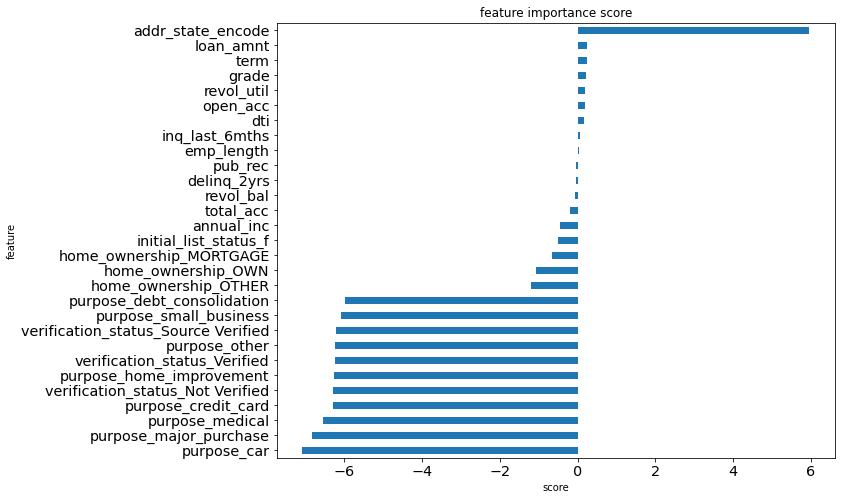

In [ ]:
feat_importances = pd.Series(model_cv.best_estimator_.coef_[0], index=X.columns)
ax = feat_importances.nlargest(36).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
# # get importance
# importance = model.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
#        print('Feature: %0d, Score: %.5f' % (i,v))
# feat_imp_ = pd.DataFrame(importance, columns = ['Importances']).join(pd.DataFrame(x_train.columns,columns = ['Features']))
# feat_imp_ = feat_imp_.sort_values(by='Importances', ascending = False)

In [ ]:
#Coefisien
# model = lr_cv_2
model_cv.best_estimator_.coef_

feature = pd.DataFrame(model_cv.best_estimator_.coef_, columns=list(X_smote.columns)).reset_index()
feature_importance = pd.melt(feature, id_vars='index', value_vars=list(X_smote.columns))
feature_importance.drop(columns=('index'), inplace=True)
feature_importance.sort_values('value', key=abs,ascending=False)

,variable,value
14,purpose_car,-7.091018
18,purpose_major_purchase,-6.822688
19,purpose_medical,-6.541257
15,purpose_credit_card,-6.298943
25,verification_status_Not Verified,-6.291523
17,purpose_home_improvement,-6.256271
27,verification_status_Verified,-6.252045
20,purpose_other,-6.233004
26,verification_status_Source Verified,-6.207880
21,purpose_small_business,-6.086346


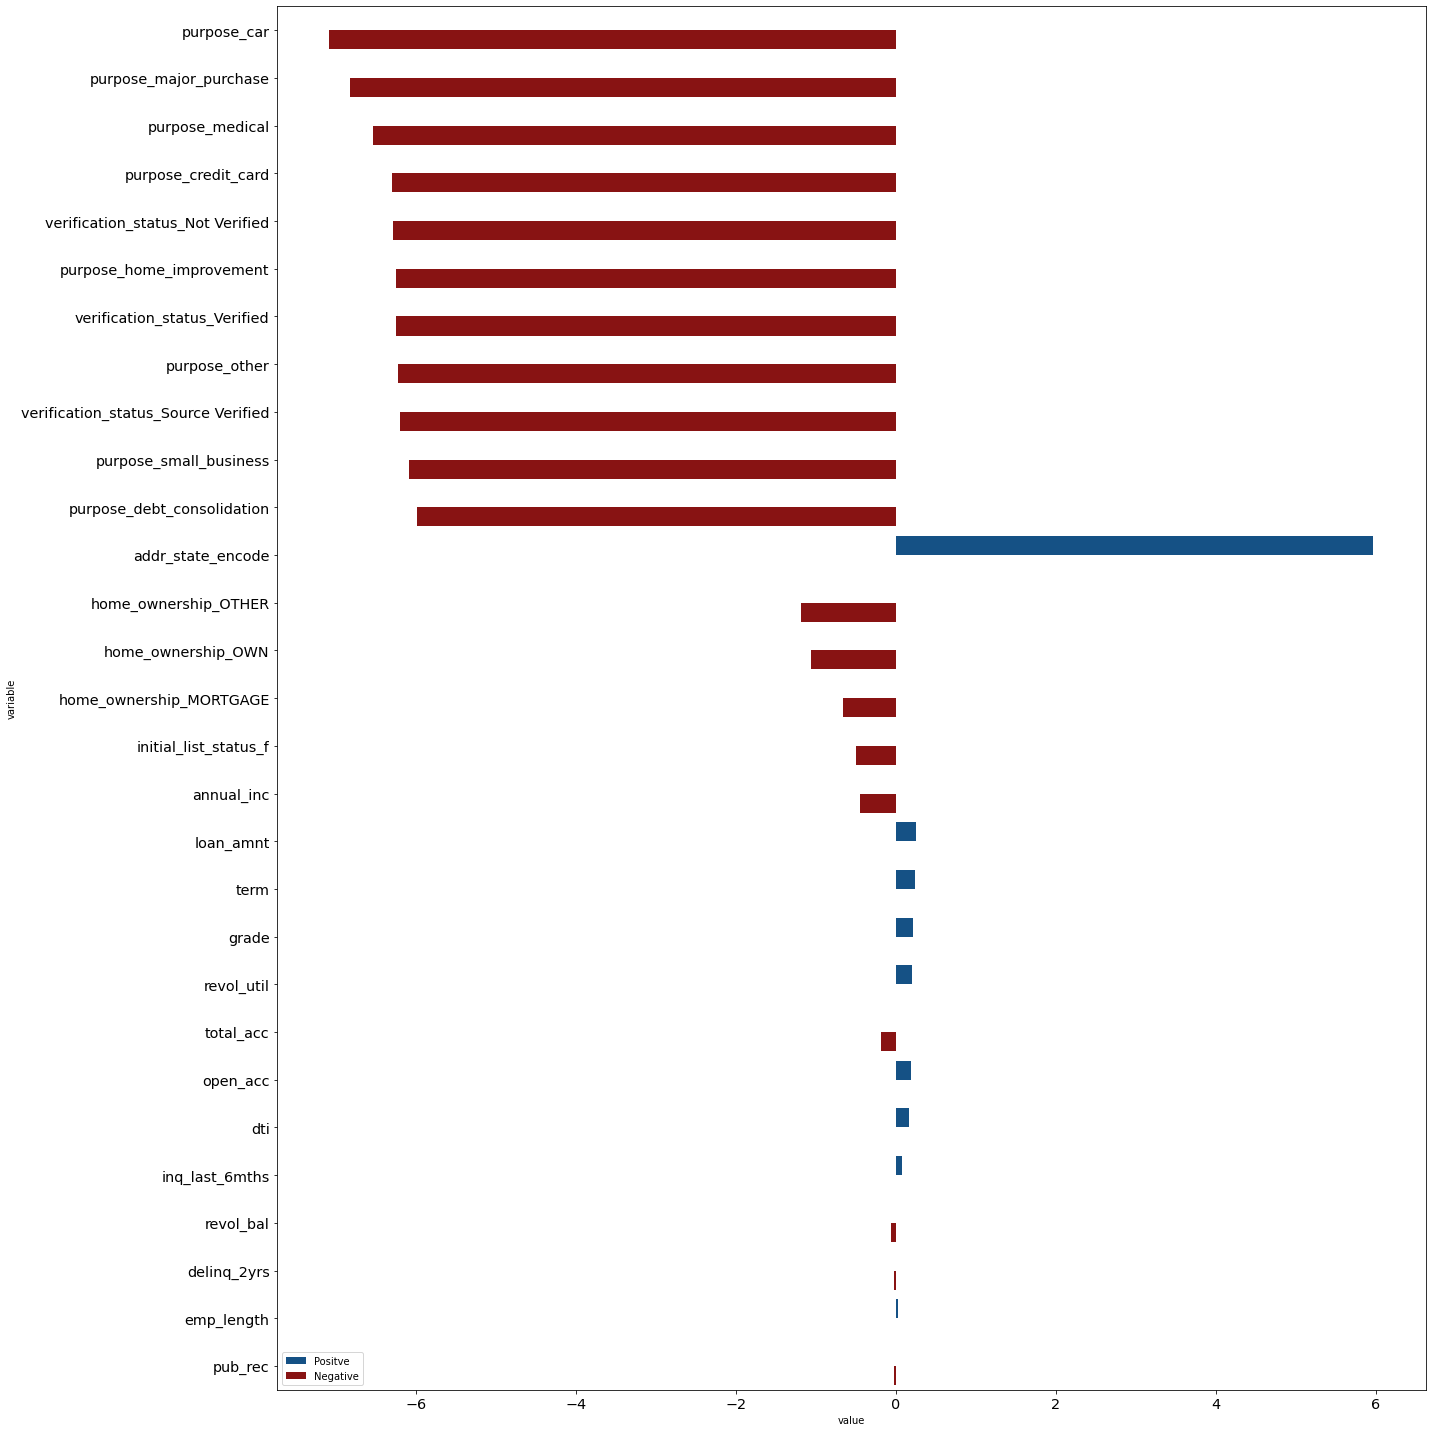

In [ ]:
colors = ['Positve' if c >= 0 else 'Negative' for c in feature_importance.value]
warna = ["#9B0000", "#000B49"]
sns.barplot(y="variable", x="value", data=feature_importance, orient='h',
             order=feature_importance.sort_values('value',key=abs,ascending = False).variable,
            hue=colors, palette=sns.color_palette(["#035397","#9B0000"]))
plt.tight_layout()
plt.show()

In [ ]:
X = data_clean_fe.drop(columns=['loan_ending','pymnt_plan','mths_since_last_delinq','out_prncp','total_rec_prncp','total_rec_int',
                                'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','tot_coll_amt',
                                'tot_cur_bal','total_rev_hi_lim','inq_last_6mths','emp_length','pub_rec','delinq_2yrs'], axis=1)
y = data_clean_fe['loan_ending']

print(X.columns.values)
print(X.shape)
print(y.shape)

['loan_amnt' 'term' 'grade' 'annual_inc' 'total_acc' 'addr_state_encode'
 'purpose_car' 'purpose_credit_card' 'purpose_debt_consolidation'
 'purpose_home_improvement' 'purpose_major_purchase' 'purpose_medical'
 'purpose_other' 'purpose_small_business' 'home_ownership_MORTGAGE'
 'home_ownership_OTHER' 'home_ownership_OWN'
 'verification_status_Not Verified' 'verification_status_Source Verified'
 'verification_status_Verified' 'initial_list_status_f']
(190879, 21)
(190879,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)

In [ ]:
# Oversampling
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X_train, y_train)

#SMOTE
X_smote, y_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [ ]:
# Evaluation Metrics
model = LogisticRegression(penalty = 'l2', solver = 'liblinear', warm_start = False, random_state=42)
model.fit(X_smote, y_smote)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_smote, y_smote, X_test, y_test)

Accuracy : 0.65
Precision : 0.29
Recall : 0.62
F-1Score : 0.40
ROC AUC : 0.64
AP : 0.25


try with 7 positif feature importance

In [ ]:
X = data_clean_fe[['addr_state_encode','loan_amnt','term','grade','revol_util','open_acc','dti']]
y = data_clean_fe['loan_ending']

print(X.columns.values)
print(X.shape)
print(y.shape)

['addr_state_encode' 'loan_amnt' 'term' 'grade' 'revol_util' 'open_acc'
 'dti']
(190879, 7)
(190879,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)

In [ ]:
from imblearn import under_sampling, over_sampling

# Oversampling
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X_train, y_train)

#SMOTE
X_smote, y_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [ ]:
# Evaluation Metrics
model = LogisticRegression(penalty = 'l2', solver = 'liblinear', warm_start = False, random_state=42)
model.fit(X_smote, y_smote)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_smote, y_smote, X_test, y_test)

Accuracy : 0.65
Precision : 0.29
Recall : 0.61
F-1Score : 0.40
ROC AUC : 0.63
AP : 0.25


In [ ]:
# Evaluation Metrics
model = LogisticRegression(penalty = 'l1', solver = 'liblinear', warm_start = False, random_state=42)
model.fit(X_smote, y_smote)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_smote, y_smote, X_test, y_test)

Accuracy : 0.65
Precision : 0.29
Recall : 0.61
F-1Score : 0.40
ROC AUC : 0.63
AP : 0.25


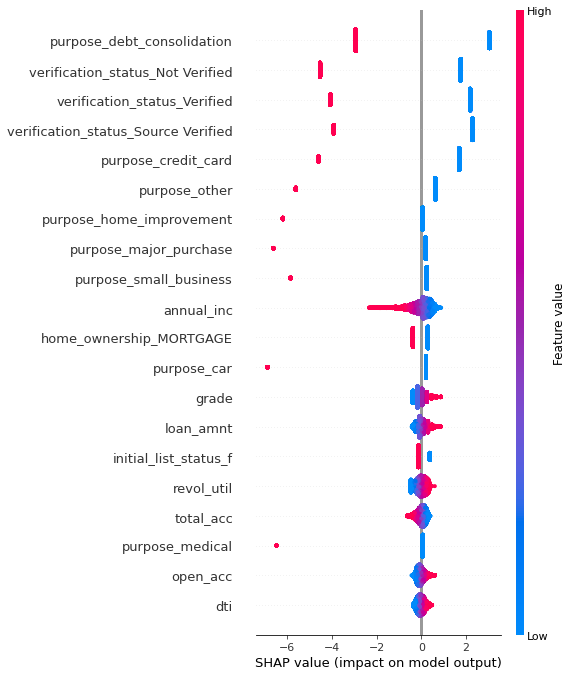

In [ ]:
import shap
explainer = shap.LinearExplainer(model, X_over, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = np.asarray(X_test)

#Feature Importance menggunakan SHAP Value (2)

shap.summary_plot(shap_values, X_test_array, feature_names = X_over.columns)

In [ ]:
X = data_clean_fe.drop(columns=['loan_ending','pymnt_plan','mths_since_last_delinq','out_prncp','total_rec_prncp','total_rec_int',
                                'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','tot_coll_amt',
                                'tot_cur_bal','total_rev_hi_lim'], axis=1)
y = data_clean_fe['loan_ending']

print(X.columns.values)
print(X.shape)
print(y.shape)

['loan_amnt' 'term' 'grade' 'emp_length' 'annual_inc' 'dti' 'delinq_2yrs'
 'inq_last_6mths' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'addr_state_encode' 'purpose_car' 'purpose_credit_card'
 'purpose_debt_consolidation' 'purpose_home_improvement'
 'purpose_major_purchase' 'purpose_medical' 'purpose_other'
 'purpose_small_business' 'home_ownership_MORTGAGE' 'home_ownership_OTHER'
 'home_ownership_OWN' 'verification_status_Not Verified'
 'verification_status_Source Verified' 'verification_status_Verified'
 'initial_list_status_f']
(190879, 29)
(190879,)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# List Hyperparameters yang akan diuji
penalty = ['l2','l1']
hyperparameters = dict(penalty=penalty)

# Inisiasi model
logres = LogisticRegression(random_state=42, solver = 'liblinear', warm_start = False) # Init Logres dengan Gridsearch, cross validation = 5
model_cv = GridSearchCV(logres, param_grid = hyperparameters, cv=5, scoring='roc_auc')
model_cv.fit(X_smote,y_smote)
model_cv.best_params_

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.8 MB/s 


In [ ]:
# plt.figure(figsize = (15,8))
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# # We sort by importance and get the features
# sns.barplot(x = 'importance', y = 'feature', data = feature_importance_with_eli5, 
#             order = feature_importance_with_eli5.sort_values('importance', ascending=False).feature)

In [ ]:
# eli5_permutation = PermutationImportance(estimator = tuned_easy_lgbm, scoring = 'f1', random_state=42, n_iter = 5)
# eli5_permutation.fit(X_test_svm, y_test_svm)
# eli5_permutation.feature_importances_.T.reshape(-1,1)
# eli5.show_weights(eli5_permutation, feature_names = X.columns.to_list())
# feature_importance_with_eli5=pd.DataFrame(np.hstack((np.array([X.columns[0:]]).T, eli5_permutation.feature_importances_.T.reshape(-1,1))), columns=['feature', 'importance'])
# feature_importance_with_eli5['importance']=pd.to_numeric(feature_importance_with_eli5['importance'])
# feature_importance_with_eli5.sort_values(by='importance', ascending=False)

## **Business Insight**

## **Benefit Analysis**

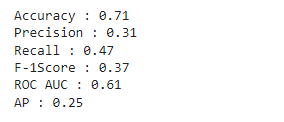

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_title                   466285 non-null  object 
 9   emp_length                  466285 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466285 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

In [ ]:
data_benefit = data.copy()

In [ ]:
#define values
ambiguous = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#drop rows that contain ambiguous ending
data_benefit = data_benefit[data_benefit.loan_status.isin(ambiguous) == False]

#create new column to classify ending when 1 equal bad loan, and 0 equal good loan
data_benefit['loan_ending'] = np.where(data_benefit['loan_status'].isin(good_loan), 0, 1)

In [ ]:
data_benefit.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_ending
count,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,2.389130e+05,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,2.389130e+05,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,238913.000000,2.389130e+05,2.389130e+05,2.389130e+05,238913.000000
mean,13486.214647,13440.797173,13312.662461,13.855453,416.935049,7.192851e+04,16.439675,0.248270,0.906748,15.398610,10.858220,0.134915,1.522316e+04,54.942430,24.811814,375.020566,374.891575,13382.976237,13251.594073,11083.394476,2132.077634,0.938372,166.565761,17.490169,5659.944597,0.005935,0.002896,1.449232e+02,9.848468e+04,2.734393e+04,0.218431
std,8066.725464,8042.190169,8080.099456,4.380770,243.750417,5.510376e+04,7.698582,0.735833,1.173727,22.601357,4.827488,0.421414,1.919444e+04,24.718732,11.663972,2329.745202,2329.040248,9389.841702,9401.574493,8155.974905,2163.315265,6.331726,762.644734,118.808133,6847.082795,0.083796,0.058514,1.877610e+04,1.414754e+05,2.440449e+04,0.413182
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7200.000000,7200.000000,7125.000000,10.990000,239.410000,4.500000e+04,10.720000,0.000000,0.000000,0.000000,7.000000,0.000000,5.913000e+03,37.200000,16.000000,0.000000,0.000000,6283.847416,6160.220000,4881.150000,746.020000,0.000000,0.000000,0.000000,417.750000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.630000e+04,0.000000
50%,12000.000000,12000.000000,11914.311470,13.670000,365.230000,6.146200e+04,16.140000,0.000000,1.000000,0.000000,10.000000,0.000000,1.098800e+04,56.600000,23.000000,0.000000,0.000000,11230.080000,11125.850000,9623.070000,1467.260000,0.000000,0.000000,0.000000,2923.690000,0.000000,0.000000,0.000000e+00,3.427200e+04,2.280000e+04,0.000000
75%,18000.000000,18000.000000,18000.000000,16.590000,545.960000,8.600000e+04,21.880000,0.000000,1.000000,28.000000,13.000000,0.000000,1.906700e+04,74.500000,32.000000,0.000000,0.000000,18158.980000,18015.650000,15125.000000,2706.540000,0.000000,0.000000,0.000000,8808.520000,0.000000,0.000000,0.000000e+00,1.571610e+05,2.950000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.990000,29.000000,33.000000,152.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,22777.580000,358.680000,33520.270000,7002.190000,36234.440000,6.000000,5.000000,9.152545e+06,8.000078e+06,2.013133e+06,1.000000


In [ ]:
Bad =  data_benefit[data_benefit['loan_ending']==1]['loan_ending'].count()
Bad

52186

In [ ]:
#Growth Calculation 
Total = data_benefit['loan_ending'].count()
Bad =  data_benefit[data_benefit['loan_ending']==1]['loan_ending'].count()
Good =  data_benefit[data_benefit['loan_ending']==0]['loan_ending'].count()
PredRate = 0.71
PredBad = round(Bad*PredRate)
PredGood = Bad-PredBad

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Total_loan : \t\t', Total)
print('Bad_loan : \t\t', Bad, ',', round(Bad/Total*100,1),'%')
print('Good_loan : \t\t', Good, ',', round(Good/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Total_loan : \t\t', Total)
print('Bad_loan : \t\t', Bad, ',', round(Bad/Total*100,1),'%')
print('  Predicted Bad_loan : \t', round(PredBad), ',', round(PredBad/Bad*100,1),'%')
print('  Predicted Good_loan : ', round(PredGood), ',', round(PredGood/Bad*100,1),'%')
print('Bad_loan After Pred : \t', Bad-PredBad, ',', round((Bad-PredBad)/Total*100,1),'%')
print('Bad_loan Growth rate : \t', round(((Bad-PredBad)/(Bad)-1)*100,1), '%')
print('Good_loan : \t\t', Good, ',', round(Good/Total*100,1),'%')
print('Good_loan After Pred : \t', Good+PredBad, ',', round((Good+PredBad)/Total*100,1),'%')
print('Good_loan Growth rate : \t', round(((Good+PredBad)/(Good)-1)*100,1), '%')

----- Existing -----
			 count percentage
Total_loan : 		 238913
Bad_loan : 		 52186 , 21.8 %
Good_loan : 		 186727 , 78.2 %

----- After Modeling -----
			 count percentage
Total_loan : 		 238913
Bad_loan : 		 52186 , 21.8 %
  Predicted Bad_loan : 	 37052 , 71.0 %
  Predicted Good_loan :  15134 , 29.0 %
Bad_loan After Pred : 	 15134 , 6.3 %
Bad_loan Growth rate : 	 -71.0 %
Good_loan : 		 186727 , 78.2 %
Good_loan After Pred : 	 223779 , 93.7 %
Good_loan Growth rate : 	 19.8 %


- Bad_loan rate potentially decrease by **-71.0%** from the previous **21.8% to become 93.7%** after action based on predictive modeling

In [ ]:
#Potential Revenue Loss Saved Calculation
TotalCost = df['Cost'].sum()
TotalDiscount = df['Discount'].sum()
TotalRevenue = TotalCost - TotalDiscount
AvgRevenue = round(TotalRevenue / Total, 2)

print('Total Cost : \t\t', '{:,}'.format(TotalCost))
print('Total Discount : \t', '{:,}'.format(TotalDiscount))
print('Total Revenue : \t', '{:,}'.format(TotalRevenue))
print('Average Revenue : \t', '{:,}'.format(AvgRevenue))
print()
print('Potential Revenue')
print('Late : \t\t\t', '{:,.2f}'.format(AvgRevenue * Late))
print('Predicted Late : \t', '{:,.2f}'.format(AvgRevenue * PredLate))
print()
print('*Nominal in Dollar $')